# Credit Card Fraud Detection
----

## About The Dataset:

#### <ins>Context:</ins>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### <ins>Content:</ins> 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### [Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


## The Index:
1. [The dependencies](#1)
2. [Explorirng the data](#2)
3. [Data counting and fraud percentage](#3)
3. [Case amount stats](#4)
3. [Distributions](#5)
3. [Scaling the amount](#6)
3. [Data spliting](#7)
3. [The Metrics](#8)
3. [Classification algorithms](#9)
3. [Performance comparaisons](#10)
3. [useful links](#11)

## <a name="1">Importing the dependencies:</a>

In [277]:
import pandas as pd # data analysis and manipulation
import numpy as np #  arrays manipulation
import matplotlib.pyplot as plt # to create visualizations
from termcolor import colored as cl # Color formatting for output in terminal
import seaborn as sns # data vizualization based on matplotlib

from imblearn.over_sampling import SMOTE #Oversampling for Imbalanced Classification (duplicate examples from the minority class)

import warnings # ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets

## scaling
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler # data scaling
from sklearn.model_selection import train_test_split # data split

## Algorithms
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors
from sklearn.linear_model import LogisticRegression # Logistic regression 
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier
from sklearn.svm import SVC # C-Support Vector Classification

from sklearn import metrics

## <a name="2">Exploring the data:</a>

In [278]:

df = pd.read_csv(r'archive/creditcard.csv') #importing data
df.head() #First 5 columns of our data
df = df.loc[1:10000] # limit data to first 10.000 cols
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15004.0,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,...,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0
9997,15008.0,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,...,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0
9998,15010.0,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,...,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0
9999,15012.0,-1.181721,1.485264,1.958715,2.587943,-0.504092,-0.126697,0.939038,0.175638,-0.756318,...,-0.010641,-0.191361,0.204004,0.663928,0.288780,-0.033612,-0.142682,0.028149,159.28,0


In [279]:
df.shape #the dimensionality of our data

(10000, 31)

## <a name="3">Data counting and fraud percentage:</a>

In [280]:

cases = len(df) # get length of the dataset to conclude num of cases
nonfraud_count = len(df[df.Class == 0]) # count of non fraud cases
fraud_count = len(df[df.Class == 1]) # count of fraud cases
fraud_percentage = round(fraud_count/nonfraud_count*100, 2) # the percentage of fraud cases

print(cl('CASE COUNT : ', attrs = ['bold'],color='red'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))
print('Total number of cases are :',end=" ")
print(cl('{}'.format(cases), attrs = ['bold'],color='green'))
print('Non-fraud cases are :',end=" ")
print(cl('{}'.format(nonfraud_count), attrs = ['bold'],color='green'))
print('Fraud cases are :',end=" ")
print(cl('{}'.format(fraud_count), attrs = ['bold'],color='green'))
print('Percentage of fraud cases is :',end=" ")
print(cl('{}%'.format(fraud_percentage), attrs = ['bold'],color='green'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))


CASE COUNT : 
--------------------------------------------
Total number of cases are : 10000
Non-fraud cases are : 9962
Fraud cases are : 38
Percentage of fraud cases is : 0.38%
--------------------------------------------


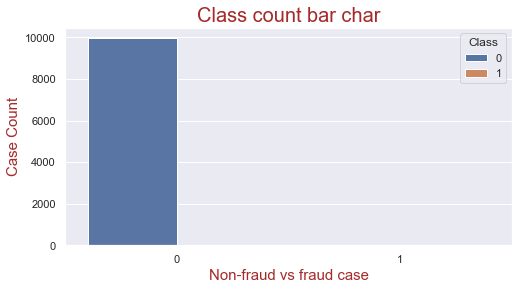

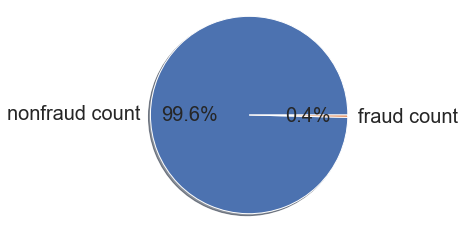

In [281]:
# A bar char representing the count of Non-fraud cases vs Fraud cases
plt.figure(figsize=(8,4),linewidth=0)
sns.set_theme(style="darkgrid")
sns.countplot(x="Class", hue="Class", data=df)
plt.title("Class count bar char", fontsize=20,color="brown")
plt.xlabel("Non-fraud vs fraud case", fontsize=15,color="brown")
plt.ylabel("Case Count", fontsize=15,color="brown")


# Pie chart, where the slices will be ordered and plotted counter-clockwise

import matplotlib.pyplot as plt

labels = 'nonfraud count', 'fraud count'
sizes = [nonfraud_count,fraud_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0,textprops={'size': '20'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()







## <a name="4">Case amount stats:</a>

In [282]:
nonfraud_cases = df[df.Class == 0]  # get non fraud cases only
fraud_cases = df[df.Class == 1] # #get fraud cases only

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold'],color="red"))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> NON-FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print((nonfraud_cases.Amount.describe()))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))


CASE AMOUNT STATISTICS
--------------------------------------------
>>> NON-FRAUD CASE AMOUNT STATS <<<
count    9962.000000
mean       62.968028
std       183.900532
min         0.000000
25%         5.147500
50%        15.950000
75%        51.157500
max      7712.430000
Name: Amount, dtype: float64
--------------------------------------------
>>> FRAUD CASE AMOUNT STATS <<<
count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64
--------------------------------------------


## <a name="5">Distributions:</a>

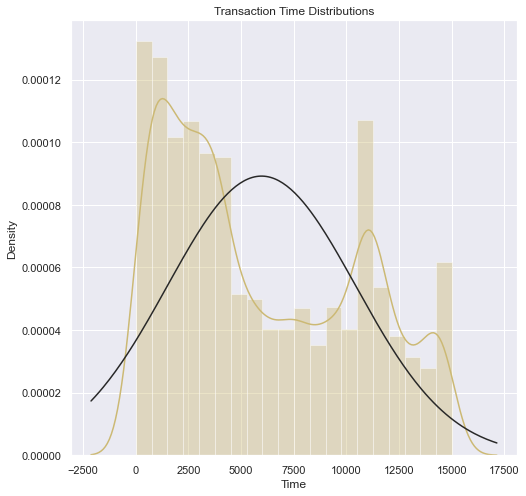

In [283]:
# Transaction Time Distribution
from scipy.stats import norm
plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')

sns.distplot(df['Time'],fit=norm,color='y')

plt.show()

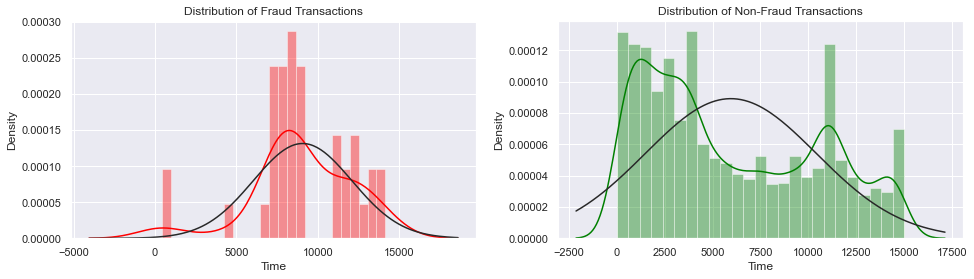

In [284]:
# Fraud Time Distribution

fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=25,color='red', ax=axs[0],fit=norm)
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=25,color='green', ax=axs[1],fit=norm)
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

## <a name="6">Scaling the amount:</a>

In [285]:
df['amount_log'] = np.log(df.Amount + 0.01) # Scale amount by log

ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1)) #Scale amount by Standardization

norm = MinMaxScaler()
df['amount_minmax'] = norm.fit_transform(df['Amount'].values.reshape(-1,1)) #Scale amount by Normalization

## <a name="7">Data spliting:</a>

In [286]:
X = df.drop(['Class','Amount','amount_minmax','amount_log'],axis=1) #remove those rows, we use amount_scaled instead of amount
y = df['Class'] # we will use y to compare it with the input


# we allocate 80% of the data for training and the remaining for testing
#X_train == training input, X_test == testing input, y_train == training output, y_test == testing output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) 

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print('\n')
print('............')
print('\n')


#duplicate examples from the fraud class (minority) to balance the data

smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)




X_train:  (8000, 30)
y_train:  (8000,)
X_test:  (2000, 30)
y_test:  (2000,)


............


X_train_smote:  (15934, 30)
y_train_smote:  (15934,)
X_test_smote:  (2000, 30)
y_test_smote:  (2000,)


## <a name="8">The Metrics:</a>

In [287]:

#store the results here for later comparaison
names=[]
aucs_tests = []   #AUC-ROC CURVE https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []
mcc_score_tests = []
balanced_accuracy_tests = []
top_k_accuracy_tests = []
cohen_kappa_tests = []

# confusion matrix plot
def confusion_matrix_plot(y_test, y_test_pred):
  confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
  plt.clf()
  plt.imshow(confusion_matrix, cmap=plt.cm.Accent)
  categoryNames = ['non fraud','fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames,color='brown')
  plt.yticks(ticks, categoryNames,color='brown')
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]),fontsize=16,color='white')
  plt.show()


# calculate the peformance of each classification methode with 9 different metrics
def performance(model):
    
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        #calculating MCC
        MCC_score_tests = metrics.matthews_corrcoef(y_test, y_test_pred)
        mcc_score_tests.append(MCC_score_tests)
        
        # calculating balanced accuracy score
        Balanced_Accuracy_test = metrics.balanced_accuracy_score(y_test,y_test_pred)
        balanced_accuracy_tests.append(Balanced_Accuracy_test)
        
        # calculating top k accuracy
        
        Top_K_Accuracy_test = metrics.top_k_accuracy_score(y_test,y_test_pred)
        top_k_accuracy_tests.append(Top_K_Accuracy_test)

        #calculating cohenvkappa score
        Cohen_kappa_test = metrics.cohen_kappa_score(y_test,y_test_pred)
        cohen_kappa_tests.append(Cohen_kappa_test)
        
        # draw confusion matrix
        confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
        
        print("Model Name :", name)
        print('Test Accuracy : {0:0.5f}'.format(Accuracy_test))
        print('Top K Accuracy Score : {0:0.5f}'.format(Top_K_Accuracy_test))
        print('Balanced Accuracy : {0:0.5f}'.format(Balanced_Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print("Matthews correlation coefficient : {0:0.5f}".format(MCC_score_tests))
        print('Cohen Kappa Score : {0:0.5f}'.format(Cohen_kappa_test))
        print('Confusion Matrix : \n',  confusion_matrix)
        confusion_matrix_plot(y_test, y_test_pred)
        print("\n")
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("threshold: ",threshold)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()




## <a name="9">Classification algorithms:</a>

Model Name : LR IMBALANCED
Test Accuracy : 0.99750
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.50000
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Matthews correlation coefficient : 0.00000
Cohen Kappa Score : 0.00000
Confusion Matrix : 
 [[1995    0]
 [   5    0]]


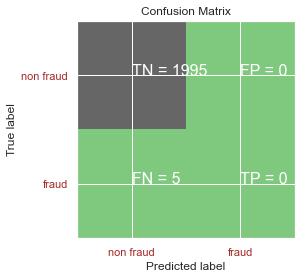



threshold:  1
Model Name : LR SMOTE
Test Accuracy : 0.99350
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99674
Test AUC : 0.99674
Test Precision : 0.27778
Test Recall : 1.00000
Test F1 : 0.43478
Matthews correlation coefficient : 0.52533
Cohen Kappa Score : 0.43256
Confusion Matrix : 
 [[1982   13]
 [   0    5]]


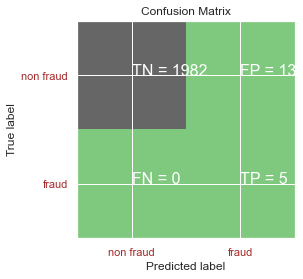



threshold:  1


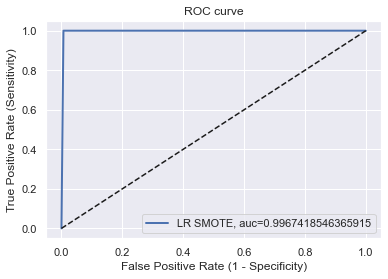

Model Name : RF IMABALANCED
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1995    0]
 [   0    5]]


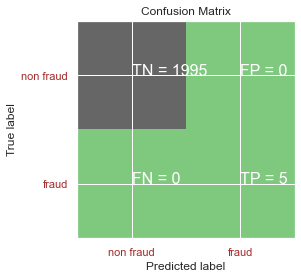



threshold:  1
Model Name : RF SMOTE
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1995    0]
 [   0    5]]


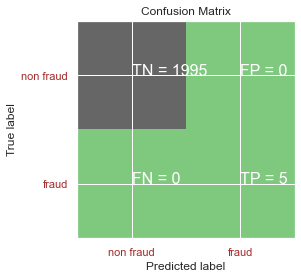



threshold:  1


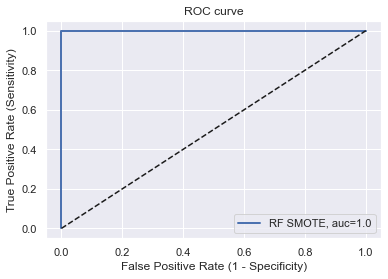

Model Name : NB IMBALANCED
Test Accuracy : 0.98700
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99348
Test AUC : 0.99348
Test Precision : 0.16129
Test Recall : 1.00000
Test F1 : 0.27778
Matthews correlation coefficient : 0.39898
Cohen Kappa Score : 0.27465
Confusion Matrix : 
 [[1969   26]
 [   0    5]]


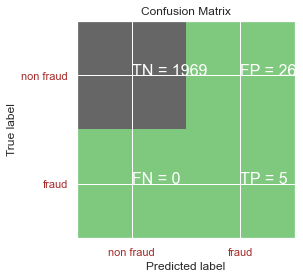



threshold:  1
Model Name : NB SMOTE
Test Accuracy : 0.98900
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99449
Test AUC : 0.99449
Test Precision : 0.18519
Test Recall : 1.00000
Test F1 : 0.31250
Matthews correlation coefficient : 0.42795
Cohen Kappa Score : 0.30959
Confusion Matrix : 
 [[1973   22]
 [   0    5]]


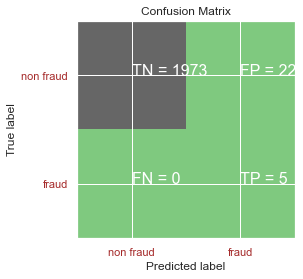



threshold:  1


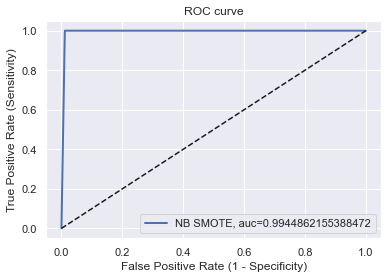

Model Name : DT IMBALANCED
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1995    0]
 [   0    5]]


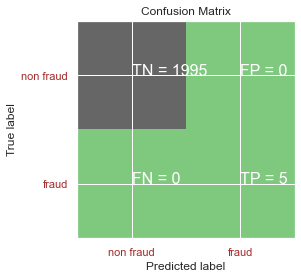



threshold:  1
Model Name : DT SMOTE
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1995    0]
 [   0    5]]


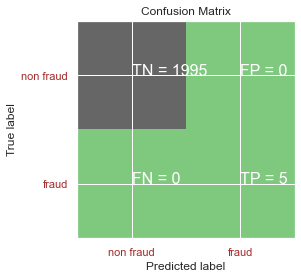



threshold:  1


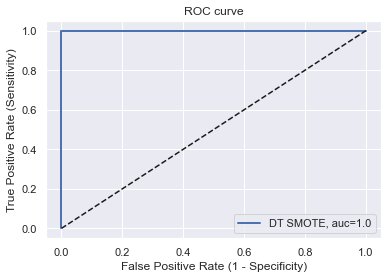

Model Name : KNN IMBALANCE
Test Accuracy : 0.99800
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.60000
Test AUC : 0.60000
Test Precision : 1.00000
Test Recall : 0.20000
Test F1 : 0.33333
Matthews correlation coefficient : 0.44677
Cohen Kappa Score : 0.33278
Confusion Matrix : 
 [[1995    0]
 [   4    1]]


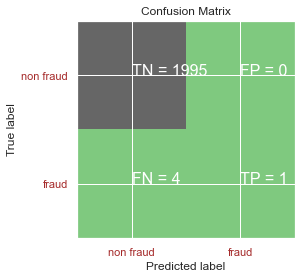



threshold:  1
Model Name : KNN SMOTE
Test Accuracy : 0.99750
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99875
Test AUC : 0.99875
Test Precision : 0.50000
Test Recall : 1.00000
Test F1 : 0.66667
Matthews correlation coefficient : 0.70622
Cohen Kappa Score : 0.66555
Confusion Matrix : 
 [[1990    5]
 [   0    5]]


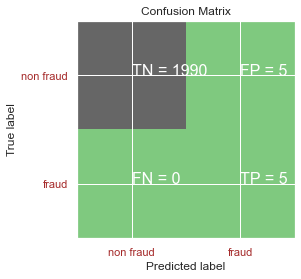



threshold:  1


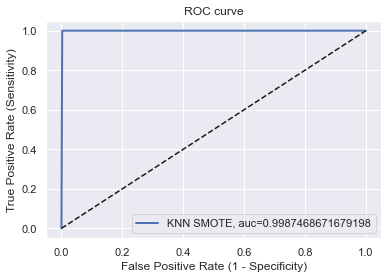

Model Name : XGBOOST IMBALANCED
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1995    0]
 [   0    5]]


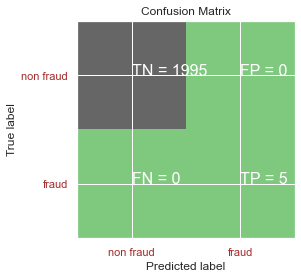



threshold:  1
Model Name : XGBOOST SMOTE
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1995    0]
 [   0    5]]


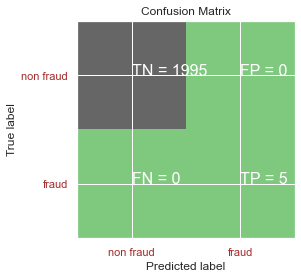



threshold:  1


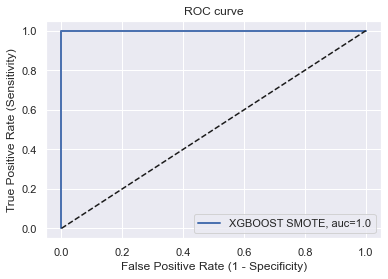

Model Name : MLPClassifier IMBALANCE
Test Accuracy : 0.99800
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.69975
Test AUC : 0.69975
Test Precision : 0.66667
Test Recall : 0.40000
Test F1 : 0.50000
Matthews correlation coefficient : 0.51549
Cohen Kappa Score : 0.49906
Confusion Matrix : 
 [[1994    1]
 [   3    2]]


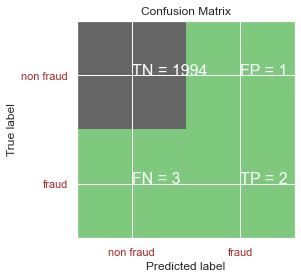



threshold:  1
Model Name : MLPClassifier SMOTE
Test Accuracy : 0.99850
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99925
Test AUC : 0.99925
Test Precision : 0.62500
Test Recall : 1.00000
Test F1 : 0.76923
Matthews correlation coefficient : 0.78997
Cohen Kappa Score : 0.76852
Confusion Matrix : 
 [[1992    3]
 [   0    5]]


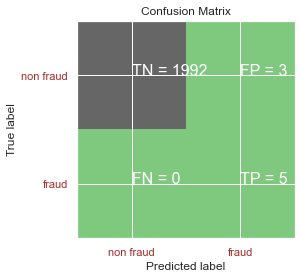



threshold:  1


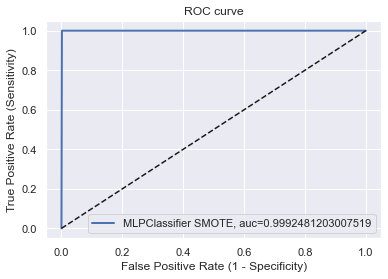

Model Name : SVMclassifier IMBALANCE
Test Accuracy : 0.99750
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.50000
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Matthews correlation coefficient : 0.00000
Cohen Kappa Score : 0.00000
Confusion Matrix : 
 [[1995    0]
 [   5    0]]


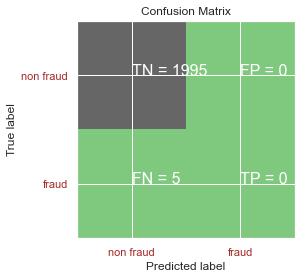



threshold:  1
Model Name : SVMclassifier SMOTE
Test Accuracy : 0.60400
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.80150
Test AUC : 0.80150
Test Precision : 0.00627
Test Recall : 1.00000
Test F1 : 0.01247
Matthews correlation coefficient : 0.06151
Cohen Kappa Score : 0.00754
Confusion Matrix : 
 [[1203  792]
 [   0    5]]


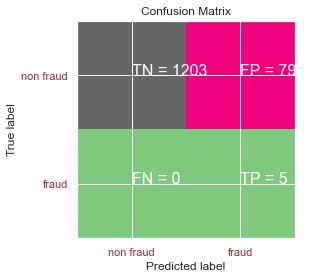



threshold:  1


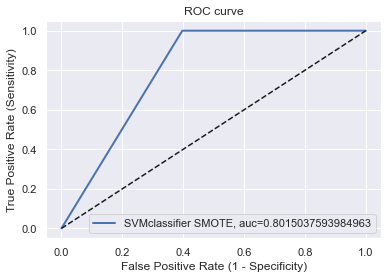

In [288]:
# 1. Logical Regression Classifier


LRmodel=[]

LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(LRmodel)

# 2. Random Forest Classifier

RFmodel = []

RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(RFmodel)


# 3. Gaussian Naïve Bayes Classifier

NBmodel = []

NBmodel.append(('NB IMBALANCED', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodel.append(('NB SMOTE', GaussianNB(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(NBmodel)

# 4. Decision Tree Classifier

DTmodel = []

DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),X_train,y_train,X_test,y_test))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(DTmodel)

# 5. K-Nearest Neighbor Class

KNNmodel = []

KNNmodel.append(('KNN IMBALANCE', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodel.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(KNNmodel)

# 6. XG Boost Classifier

xgBOOST=[]
xgBOOST.append(('XGBOOST IMBALANCED', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train, y_train, X_test, y_test))
xgBOOST.append(('XGBOOST SMOTE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(xgBOOST)

# 7. MLP Classifier

MLPclassifier=[]

MLPclassifier.append(('MLPClassifier IMBALANCE', MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train,y_train,X_test,y_test))
MLPclassifier.append(('MLPClassifier SMOTE',MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(MLPclassifier)

#8. SVM(SVC)


SVMclassifier=[]

SVMclassifier.append(('SVMclassifier IMBALANCE', SVC(kernel='sigmoid', random_state=77,cache_size=1000),X_train,y_train,X_test,y_test))
SVMclassifier.append(('SVMclassifier SMOTE',SVC(kernel='sigmoid', random_state=77,cache_size=1000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))

performance(SVMclassifier)

#Randomness of the underlying implementations: The underlying implementations of 
#SVC and NuSVC use a random number generator only to shuffle the data for probability estimation (when probability is set to True)

## <a name="10">Performance comparaisons:</a>

In [289]:
# COMPARE MCC SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'Accuracy': accuracy_tests,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    "Balanced Accuracy": balanced_accuracy_tests,
    "Top K Accuracy": top_k_accuracy_tests,
    "Cohen Kappa Score": cohen_kappa_tests,
    'MCC Score': mcc_score_tests,
}
print("Comparing performance of various Classifiers: ")
comparison=pd.DataFrame(comparison)
comparison.sort_values('MCC Score',ascending=False)

Comparing performance of various Classifiers: 


,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score,Balanced Accuracy,Top K Accuracy,Cohen Kappa Score,MCC Score
2,RF IMABALANCED,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000
3,RF SMOTE,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000
6,DT IMBALANCED,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000
7,DT SMOTE,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000
10,XGBOOST IMBALANCED,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000
11,XGBOOST SMOTE,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000
13,MLPClassifier SMOTE,0.9985,0.999248,0.625000,1.0,0.769231,0.999248,1.0,0.768519,0.789975
9,KNN SMOTE,0.9975,0.998747,0.500000,1.0,0.666667,0.998747,1.0,0.665552,0.706220
1,LR SMOTE,0.9935,0.996742,0.277778,1.0,0.434783,0.996742,1.0,0.432562,0.525326
12,MLPClassifier IMBALANCE,0.9980,0.699749,0.666667,0.4,0.500000,0.699749,1.0,0.499061,0.515492


In [290]:
# COMPARE Accuracy SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    "Balanced Accuracy": balanced_accuracy_tests,
    "Top K Accuracy": top_k_accuracy_tests,
    "Cohen Kappa Score": cohen_kappa_tests,
    'MCC Score': mcc_score_tests,
    'Accuracy': accuracy_tests,
}
print("Comparing performance of various Classifiers:")
comparison=pd.DataFrame(comparison)
comparison.sort_values('Accuracy',ascending=False)

Comparing performance of various Classifiers:


,Model,AUC,Precision Score,Recall Score,F1 Score,Balanced Accuracy,Top K Accuracy,Cohen Kappa Score,MCC Score,Accuracy
2,RF IMABALANCED,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
3,RF SMOTE,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
6,DT IMBALANCED,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
7,DT SMOTE,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
10,XGBOOST IMBALANCED,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
11,XGBOOST SMOTE,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
13,MLPClassifier SMOTE,0.999248,0.625000,1.0,0.769231,0.999248,1.0,0.768519,0.789975,0.9985
8,KNN IMBALANCE,0.600000,1.000000,0.2,0.333333,0.600000,1.0,0.332777,0.446766,0.9980
12,MLPClassifier IMBALANCE,0.699749,0.666667,0.4,0.500000,0.699749,1.0,0.499061,0.515492,0.9980
0,LR IMBALANCED,0.500000,0.000000,0.0,0.000000,0.500000,1.0,0.000000,0.000000,0.9975


## <a name="11">Useful links:</a>

1. [handling unbalanced data](https://medium.com/analytics-vidhya/handling-imbalanced-dataset-522dfcae4a3c)
2. [oversimpling vs undersimpling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=Imbalanced%20datasets%20are,class%2C%20called%20oversampling.)
3. [list of metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
